This notebook explores a NYC DOE 2019-2021 attendance dataset.

# 0. Import Libraries

In [57]:
import pandas as pd
import numpy as np
import datetime

# 1. Import Data

- [NYC DOE 2019-2021 Attendance Data](https://data.cityofnewyork.us/Education/2018-2021-Daily-Attendance-by-School/xc44-2jrh)

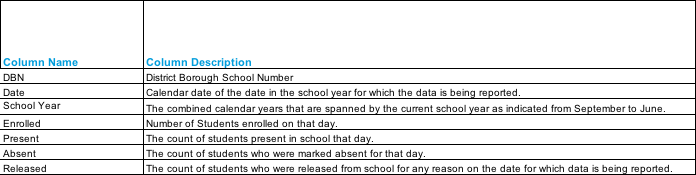

In [2]:
df = pd.read_csv('Data/2018-2021_Daily_Attendance_by_School.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456170 entries, 0 to 456169
Data columns (total 7 columns):
School DBN    456170 non-null object
Date          456170 non-null object
SchoolYear    456170 non-null int64
Enrolled      456170 non-null int64
Present       456170 non-null int64
Absent        456170 non-null int64
Released      456170 non-null int64
dtypes: int64(5), object(2)
memory usage: 24.4+ MB


In [80]:
df.head()

,School DBN,Date,SchoolYear,Enrolled,Present,Absent,Released,Date2
0,15K896,09/05/2018,20182019,14,14,0,0,2018-09-05
1,15K896,09/06/2018,20182019,26,26,0,0,2018-09-06
2,15K896,09/07/2018,20182019,26,25,1,0,2018-09-07
3,15K896,09/12/2018,20182019,27,26,1,0,2018-09-12
4,15K896,09/13/2018,20182019,28,27,1,0,2018-09-13


# 2. Explore Variables

In [51]:
df.shape      # how many rows and columns in dataframe?

(456170, 7)

In [28]:
df.nunique()  # how many unique counts of each variable?

School DBN    1579
Date           300
SchoolYear       2
Enrolled      3679
Present       4128
Absent         829
Released       604
dtype: int64

In [52]:
df.isnull().all()  # which columns have null?

School DBN    False
Date          False
SchoolYear    False
Enrolled      False
Present       False
Absent        False
Released      False
dtype: bool

In [61]:
df['Date2'] = pd.to_datetime(df['Date'])
min(df['Date2']), max(df['Date2'])       # what are the min & max dates with recorded attendance?

(Timestamp('2018-09-04 00:00:00'), Timestamp('2020-03-13 00:00:00'))

# 3. EDA

In [67]:
# greatest and least enrollments by School DBN
df.groupby(['School DBN'])['Enrolled'].max().min(), df.groupby(['School DBN'])['Enrolled'].max().max()

(68, 6059)

In [127]:
df['SchoolYear'].value_counts()

20182019    276606
20192020    179564
Name: SchoolYear, dtype: int64

In [103]:
# check if individual schools have duplicate dates capturing attendance
a,b=df[['School DBN', 'Date2']],df[['School DBN', 'Date2']].drop_duplicates()
print(a.count())
print(a.count())

School DBN    456170
Date2         456170
dtype: int64
School DBN    456170
Date2         456170
dtype: int64


In [126]:
# what is the total max, or limit, of possible total enrollment across schools?
df.groupby(['SchoolYear','School DBN'])['Enrolled'].max().groupby('SchoolYear').sum()
#df.groupby(['School DBN','Date2'])['Enrolled'].sum().groupby('SchoolYear').max() 

SchoolYear
20182019    964562
20192020    948485
Name: Enrolled, dtype: int64

In [112]:
# what is the max total enrollment during a single day by schoolyear?
df.groupby(['SchoolYear','Date2'])['Enrolled'].sum().groupby('SchoolYear').max() 

SchoolYear
20182019    946736
20192020    933086
Name: Enrolled, dtype: int64

In [138]:
# what are percentages of absent / enrolled; present / enrolled; released / enrolled

df['present_perc'] = round(df['Present'] / df['Enrolled'],2)
df['absent_perc'] = round(df['Absent'] / df['Enrolled'],2)
df['released_perc'] = round(df['Released'] / df['Enrolled'],2)

df.head()

,School DBN,Date,SchoolYear,Enrolled,Present,Absent,Released,Date2,present_perc,absent_perc,released_perc
0,15K896,09/05/2018,20182019,14,14,0,0,2018-09-05,1.00,0.00,0.0
1,15K896,09/06/2018,20182019,26,26,0,0,2018-09-06,1.00,0.00,0.0
2,15K896,09/07/2018,20182019,26,25,1,0,2018-09-07,0.96,0.04,0.0
3,15K896,09/12/2018,20182019,27,26,1,0,2018-09-12,0.96,0.04,0.0
4,15K896,09/13/2018,20182019,28,27,1,0,2018-09-13,0.96,0.04,0.0


In [141]:
# max perc by School DBN and SchoolYear
(df # .query("")
 .groupby(['School DBN', 'SchoolYear'])
 .agg('max'))

Date  Enrolled  Present  Absent  Released  \
School DBN SchoolYear                                                    
01M015     20182019    12/21/2018       177      172      52        11   
           20192020    12/20/2019       190      183      48        14   
01M019     20182019    12/21/2018       258      245     106       247   
           20192020    12/20/2019       245      235      93         1   
01M020     20182019    12/21/2018       487      464     170         0   
...                           ...       ...      ...     ...       ...   
75X721     20192020    12/20/2019       577      515     316        39   
75X754     20182019    12/21/2018       492      335     301       476   
           20192020    12/20/2019       477      315     270       166   
75X811     20182019    12/21/2018       637      565     321       597   
           20192020    12/20/2019       643      565     388        32   

                           Date2  present_perc  absent_perc  released_perc  
School DBN SchoolYear                                                       
01M015     20182019   2019-06-26          0.98         0.30           0.06  
           20192020   2020-03-13          0.98         0.26           0.08  
01M019     20182019   2019-06-26          0.98         0.42           1.00  
           20192020   2020-03-13          0.98         0.38           0.00  
01M020     20182019   2019-06-26          0.97         0.35           0.00  
...                          ...           ...          ...            ...  
75X721     20192020   2020-03-13          0.90         0.55           0.07  
75X754     20182019   2019-06-26          0.69         0.63           0.99  
           20192020   2020-03-13          0.68         0.58           0.36  
75X811     20182019   2019-06-26          0.89         0.51           0.94  
           20192020   2020-03-13          0.88         0.61           0.05  

[3155 rows x 9 columns]

In [142]:
# max perc by School DBN and SchoolYear (unstacked)
(df # .query("")
 .groupby(['School DBN', 'SchoolYear'])
 .agg('max')
 .unstack())

Date             Enrolled           Present           \
SchoolYear    20182019    20192020 20182019 20192020 20182019 20192020   
School DBN                                                               
01M015      12/21/2018  12/20/2019    177.0    190.0    172.0    183.0   
01M019      12/21/2018  12/20/2019    258.0    245.0    245.0    235.0   
01M020      12/21/2018  12/20/2019    487.0    481.0    464.0    448.0   
01M034      12/21/2018  12/20/2019    314.0    299.0    297.0    280.0   
01M063      12/21/2018  12/20/2019    235.0    237.0    226.0    232.0   
...                ...         ...      ...      ...      ...      ...   
75X469      12/21/2018  12/20/2019    337.0    422.0    310.0    404.0   
75X596      12/21/2018  12/20/2019    418.0    415.0    399.0    396.0   
75X721      12/21/2018  12/20/2019    547.0    577.0    485.0    515.0   
75X754      12/21/2018  12/20/2019    492.0    477.0    335.0    315.0   
75X811      12/21/2018  12/20/2019    637.0    643.0    565.0    565.0   

             Absent          Released               Date2             \
SchoolYear 20182019 20192020 20182019 20192020   20182019   20192020   
School DBN                                                             
01M015         52.0     48.0     11.0     14.0 2019-06-26 2020-03-13   
01M019        106.0     93.0    247.0      1.0 2019-06-26 2020-03-13   
01M020        170.0    196.0      0.0      1.0 2019-06-26 2020-03-13   
01M034        166.0    126.0     17.0      0.0 2019-06-26 2020-03-13   
01M063         76.0     81.0     26.0     29.0 2019-06-26 2020-03-13   
...             ...      ...      ...      ...        ...        ...   
75X469        183.0    148.0      1.0      1.0 2019-06-26 2020-03-13   
75X596        147.0    121.0      6.0      2.0 2019-06-26 2020-03-13   
75X721        242.0    316.0    493.0     39.0 2019-06-26 2020-03-13   
75X754        301.0    270.0    476.0    166.0 2019-06-26 2020-03-13   
75X811        321.0    388.0    597.0     32.0 2019-06-26 2020-03-13   

           present_perc          absent_perc          released_perc           
SchoolYear     20182019 20192020    20182019 20192020      20182019 20192020  
School DBN                                                                    
01M015             0.98     0.98        0.30     0.26          0.06     0.08  
01M019             0.98     0.98        0.42     0.38          1.00     0.00  
01M020             0.97     0.96        0.35     0.42          0.00     0.00  
01M034             0.96     0.94        0.54     0.43          0.06     0.00  
01M063             0.98     0.98        0.33     0.35          0.11     0.13  
...                 ...      ...         ...      ...           ...      ...  
75X469             0.94     0.96        0.55     0.36          0.00     0.00  
75X596             0.96     0.96        0.36     0.29          0.01     0.00  
75X721             0.90     0.90        0.45     0.55          0.90     0.07  
75X754             0.69     0.68        0.63     0.58          0.99     0.36  
75X811             0.89     0.88        0.51     0.61          0.94     0.05  

[1579 rows x 18 columns]

# more: next/todo

In [ ]:
# query by top enrollments
(df.query('Item_ID in @top')
 .groupby(["score_outcome", "Item_ID"])
 .agg('sum')
 .unstack()
 .plot(figsize = (16, 12)))

In [ ]:
# visualize percent rates... by school? by year? by date?

In [ ]:

- [NYC DOE 2013-2019 Attendance Data](https://data.cityofnewyork.us/Education/2013-2019-Attendance-Results-School/vww9-qguh)
- [NYC DOE School Districts GIS Data](https://data.cityofnewyork.us/Education/School-Districts/r8nu-ymqj)